### Running example with a test signal

In [1]:
import numpy as np
import vineda

# VINEDA ALGORITHM DESCRIPTION

VINEDA is a pure signal processing algorithm designed to search for infrasound explosions. For demonstration purposes, we have selected an infrasound signal previously saved into ".mat" format, but it can be extended to any of the most common seismic data formats.  The nature of infrasound explosions requires specific signal processing techniques in order to exploit wave information in highly heterogeneous media. The implemented pipeline is depicted below:

![title](figures/figure1.jpg)


From this block diagram, successive processing steps are shown. First, the infrasonic data stream is decimated and filtered to suppress noise and avoid spike distortions. The successive steps focus on the detection of explosive onsets, using specialized filters. A discriminant detector based on a priori knowledge of the infrasonic explosions. The computed characteristic function, CF, contains the detected explosions. The details of the mathematical implementation of the algorithm are described in the following article: 

``
Vineda: Volcanic Infrasound Explosions Detector Algorithm. Frontiers in Earth Science (2019). Bueno, A., Diaz-Moreno, A., Alvarez, I., De la Torre, A., Lamb, O.D., Zuccarello, L. and De Angelis, S.  
``

In this notebook, we first read the signal (test_signal.mat), convert to obspy format (so that the user can better grasp how VINEDA can be interfaced with current pipelines) and call the detection function.

In [4]:
# read the data
x = vineda.read_mat_file("PruebaSignal_1.mat")
signal = np.asarray(x["signal"])
fs = float(x["fs"])
# we convert to obspy to take advantage of Obspy processing routines.
stream = vineda.convert_to_obspy(signal, fs)

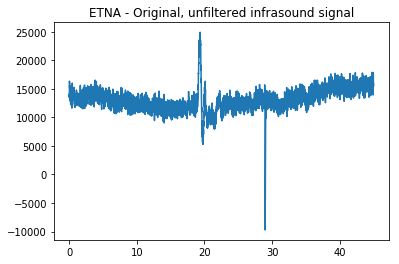

In [5]:
vineda.plot_stream(stream, 100.0, "ETNA - Original, unfiltered infrasound signal")

In [7]:
fs = 100.0  # Original sampling rate
f_high = 5.0  # Corner top frequency of the filter bank
f_low = 1.0  # Minimum frequency of the band pass filter
nfb = 3.0  # number of frequency bands 
dmin = 2.0 # minimum duration of the events
dmax = 5.0 # maximum duration of the events
ndb = 3.0 # Number of duration bands. IN this case, it will create a temporal array of duration 2.0, 3.0, 4.0, 5.0
beta = 3.0  # Penalty factor for non - impulsive onsets

In [8]:
cf, fsp = vineda.detect_explosions(stream, stream.stats.sampling_rate, f_low, f_high, nfb, dmin, dmax, ndb, beta)

/home/abueno/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]
/home/abueno/anaconda2/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/abueno/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

## Plot results

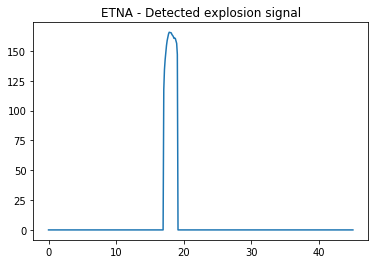

In [10]:
vineda.plot_stream(cf, fsp, "ETNA - Detected explosion signal")